In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [137]:
def prep_dataset(data_raw):
  # Preparing the dataset
  data = data_raw.copy()
  data = data.drop('Unnamed: 0', axis=1)
  data['Activity Month'] = pd.to_datetime(data['Activity Month'])
  data['Year'] = data['Activity Month'].dt.year
  data['Quarter'] = data['Activity Month'].dt.quarter

  # Preparing the dataset: Drop irrelevant periods
  data = data[~((data['Store'] == 'UK') & (data['Activity Month'] < '2020-01-01'))]
  data = data[~((data['Store'] == 'EU+DE') & (data['Activity Month'] < '2021-05-01'))]
  data = data[~((data['Store'] == 'US') & (data['Activity Month'] < '2019-09-01'))]


  data = data[data['Acquisition Proportion'] != 0]

  return data

def plot_store_quarter(data):
  # Plotting scatter plots for each quarter and each store separately
  fig, axes = plt.subplots(3, 4, figsize=(25, 10))  # 3 stores and 4 quarters

  # Getting unique store names from the dataset
  unique_stores = data['Store'].unique()

  for i, store in enumerate(unique_stores):
      for q in range(1, 5):
          # Selecting the axis for the current plot
          ax = axes[i, q-1]
          # Filtering data for the specific quarter and store
          quarter_data = data[(data['Quarter'] == q) & (data['Store'] == store)]

          # Create a scatter plot with hue for years
          sns.scatterplot(x='Acquisition Proportion', y='Activity Rate', data=quarter_data, hue='Year', palette=sns.color_palette("rocket", 9), ax=ax)

          # Overlay a regression line without coloring by year
          sns.regplot(x='Acquisition Proportion', y='Activity Rate', data=quarter_data, scatter=False, ax=ax)

          ax.set_title(f'{store} - Q{q}')
          ax.set_xlabel('Acquisition Proportion')
          ax.set_ylabel('Activity Rate')

          # Place the legend outside the plot
          ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

  # Adjust the layout
  plt.tight_layout()
  plt.show()

def plot_store(data):
  # Plotting scatter plots for each store
  fig, axes = plt.subplots(1, 3, figsize=(26, 5))  # 1 row, 3 columns for 3 stores

  # Getting unique store names from the dataset
  unique_stores = data['Store'].unique()

  for i, store in enumerate(unique_stores):
      # Selecting the axis for the current plot
      ax = axes[i]
      # Filtering data for the specific store
      store_data = data[data['Store'] == store]

      # Create a scatter plot with hue for years
      palette = sns.color_palette("rocket", 9)
      sns.scatterplot( x='Acquisition Proportion', y='Activity Rate', data=store_data, hue='Year', palette=palette, ax=ax)

      # Overlay a regression line without coloring by year
      sns.regplot(x='Acquisition Proportion', y='Activity Rate', data=store_data, scatter=False, ax=ax)

      ax.set_title(f'{store}')
      ax.set_xlabel('Acquisition Proportion')
      ax.set_ylabel('Activity Rate')

      # Place the legend outside the plot
      ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left', )

  # Adjust the layout
  plt.tight_layout()
  plt.show()

def plot_quarter(data):
  fig, axes = plt.subplots(1, 4, figsize=(26, 4))  # 1 row, 4 columns for 4 quarters

  for q in range(1, 5):
      # Selecting the axis for the current plot
      ax = axes[q-1]
      # Filtering data for the specific quarter
      quarter_data = data[data['Quarter'] == q]

      # Create a scatter plot with hue for years
      sns.scatterplot(x='Acquisition Proportion', y='Activity Rate', data=quarter_data, hue='Year', palette=sns.color_palette("rocket", 9), ax=ax)

      # Overlay a regression line without coloring by year
      sns.regplot(x='Acquisition Proportion', y='Activity Rate', data=quarter_data, scatter=False, ax=ax)

      ax.set_title(f'Q{q}')
      ax.set_xlabel('Acquisition Proportion')
      ax.set_ylabel('Activity Rate')

      # Place the legend outside the plot
      ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

  # Adjust the layout
  plt.tight_layout()
  plt.show()

In [138]:
file_path = 'customer_activity.xlsx'
data_raw = pd.read_excel(file_path)
data_raw

,Unnamed: 0,Activity Month,Store,Activity Interval,Recent Acquisitions,Activity Rate,Acquisition Proportion
0,1,2023-11-01,US,12-Month,1128,0.036362,0.131041
1,2,2023-11-01,US,6-Month,1128,0.075787,0.273123
2,3,2023-11-01,US,3-Month,1128,0.133990,0.482877
3,4,2023-11-01,UK,12-Month,7022,0.048491,0.101371
4,5,2023-11-01,UK,6-Month,7022,0.082448,0.172357
...,...,...,...,...,...,...,...
697,698,2013-04-01,UK,6-Month,0,7.000000,0.000000
698,699,2013-04-01,UK,3-Month,0,7.000000,0.000000
699,700,2013-03-01,UK,12-Month,0,3.000000,0.000000
700,701,2013-03-01,UK,6-Month,0,3.000000,0.000000


In [139]:
# Load the Excel file
data_raw12 = data_raw[data_raw['Activity Interval'] == '12-Month']
data_raw6 = data_raw[data_raw['Activity Interval'] == '6-Month']
data_raw3 = data_raw[data_raw['Activity Interval'] == '3-Month']

In [140]:
data12 = prep_dataset(data_raw12)
data6 = prep_dataset(data_raw6)
data3 = prep_dataset(data_raw3)

<ipython-input-137-85a0ba823ca3>:65: UserWarning: The palette list has more values (9) than needed (5), which may not be intended.
  sns.scatterplot( x='Acquisition Proportion', y='Activity Rate', data=store_data, hue='Year', palette=palette, ax=ax)
<ipython-input-137-85a0ba823ca3>:65: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  sns.scatterplot( x='Acquisition Proportion', y='Activity Rate', data=store_data, hue='Year', palette=palette, ax=ax)
<ipython-input-137-85a0ba823ca3>:65: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.scatterplot( x='Acquisition Proportion', y='Activity Rate', data=store_data, hue='Year', palette=palette, ax=ax)


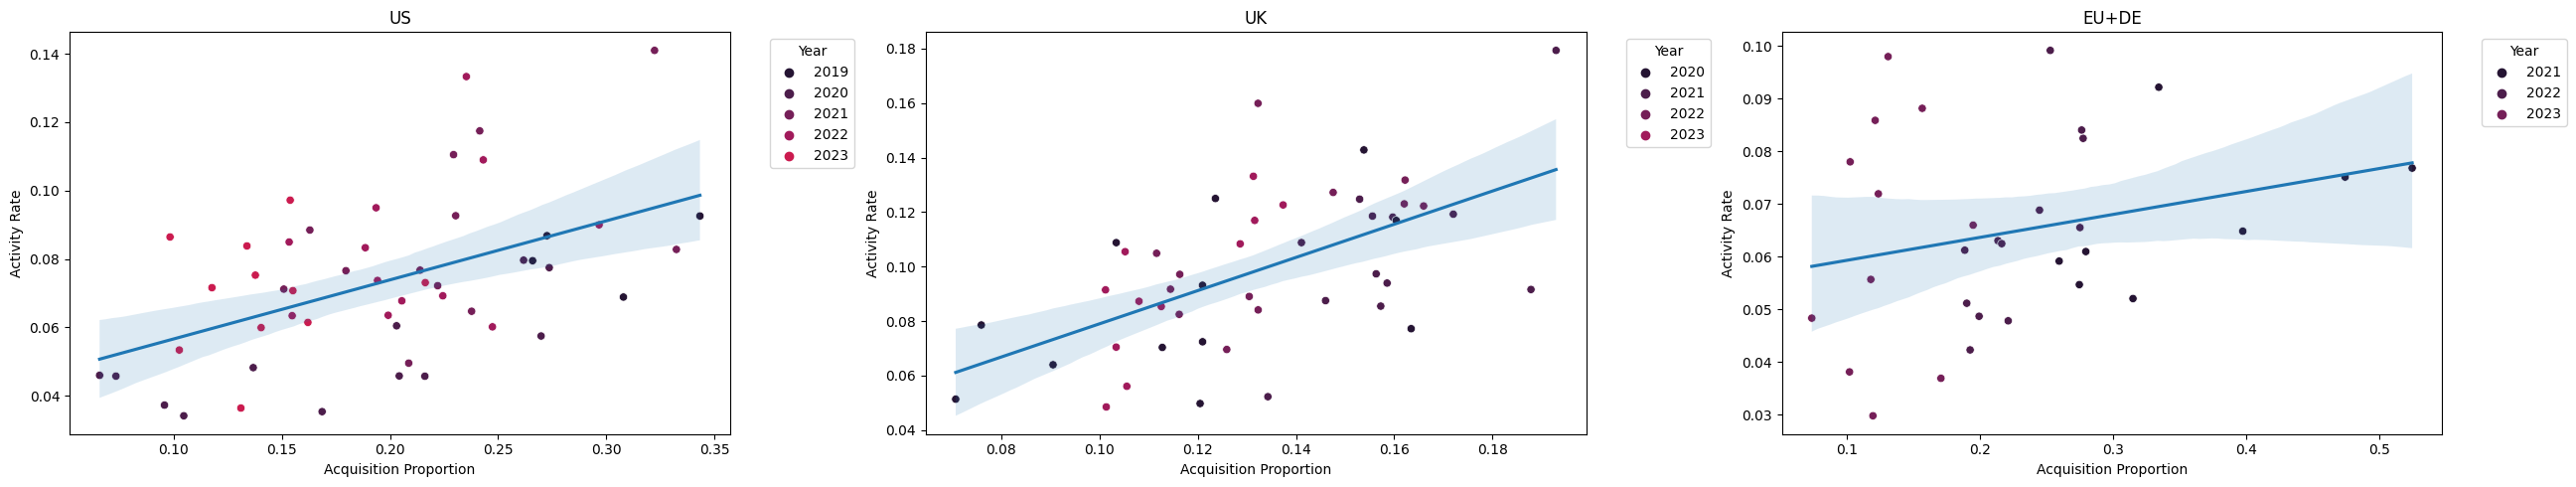

In [141]:
plot_store(data12)

<ipython-input-137-85a0ba823ca3>:91: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  sns.scatterplot(x='Acquisition Proportion', y='Activity Rate', data=quarter_data, hue='Year', palette=sns.color_palette("rocket", 9), ax=ax)
<ipython-input-137-85a0ba823ca3>:91: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  sns.scatterplot(x='Acquisition Proportion', y='Activity Rate', data=quarter_data, hue='Year', palette=sns.color_palette("rocket", 9), ax=ax)
<ipython-input-137-85a0ba823ca3>:91: UserWarning: The palette list has more values (9) than needed (5), which may not be intended.
  sns.scatterplot(x='Acquisition Proportion', y='Activity Rate', data=quarter_data, hue='Year', palette=sns.color_palette("rocket", 9), ax=ax)
<ipython-input-137-85a0ba823ca3>:91: UserWarning: The palette list has more values (9) than needed (5), which may not be intended.
  sns.scatterplot(x='Acquisition Proportion', y

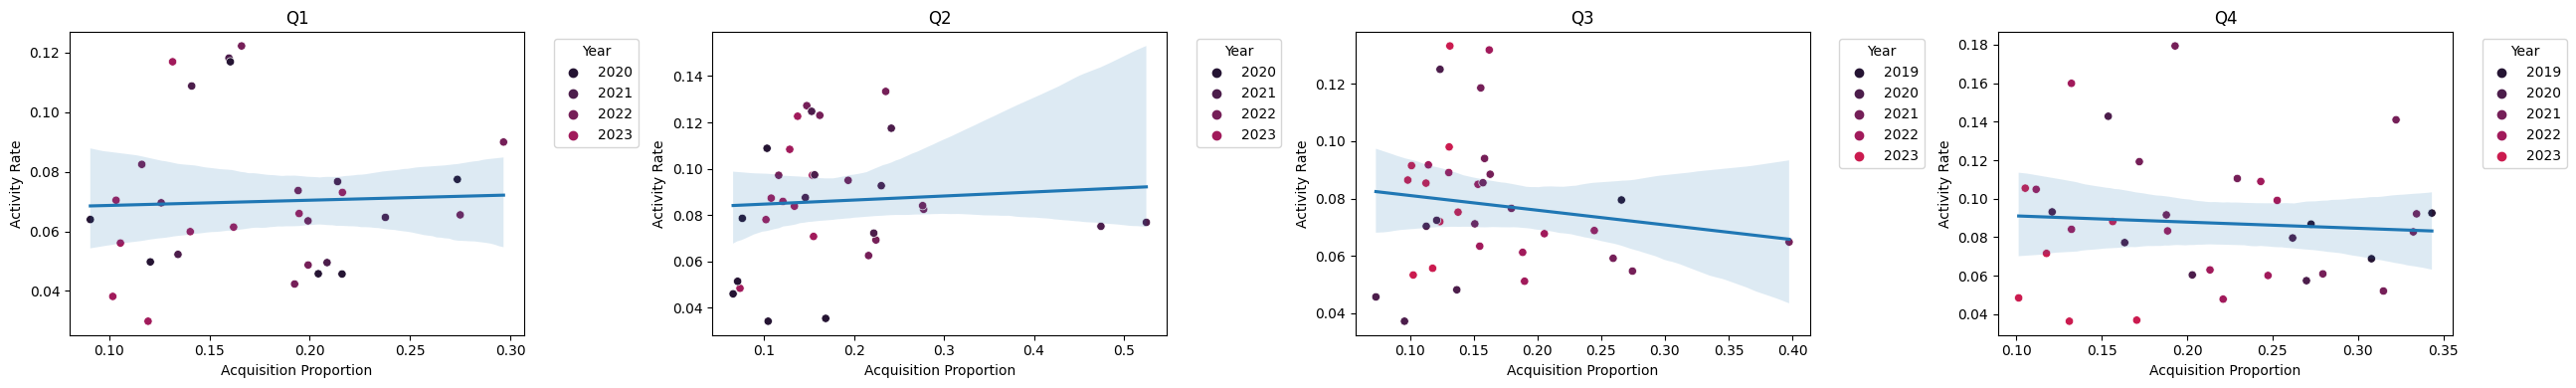

In [142]:
plot_quarter(data12)

<ipython-input-137-85a0ba823ca3>:34: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  sns.scatterplot(x='Acquisition Proportion', y='Activity Rate', data=quarter_data, hue='Year', palette=sns.color_palette("rocket", 9), ax=ax)
<ipython-input-137-85a0ba823ca3>:34: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  sns.scatterplot(x='Acquisition Proportion', y='Activity Rate', data=quarter_data, hue='Year', palette=sns.color_palette("rocket", 9), ax=ax)
<ipython-input-137-85a0ba823ca3>:34: UserWarning: The palette list has more values (9) than needed (5), which may not be intended.
  sns.scatterplot(x='Acquisition Proportion', y='Activity Rate', data=quarter_data, hue='Year', palette=sns.color_palette("rocket", 9), ax=ax)
<ipython-input-137-85a0ba823ca3>:34: UserWarning: The palette list has more values (9) than needed (5), which may not be intended.
  sns.scatterplot(x='Acquisition Proportion', y

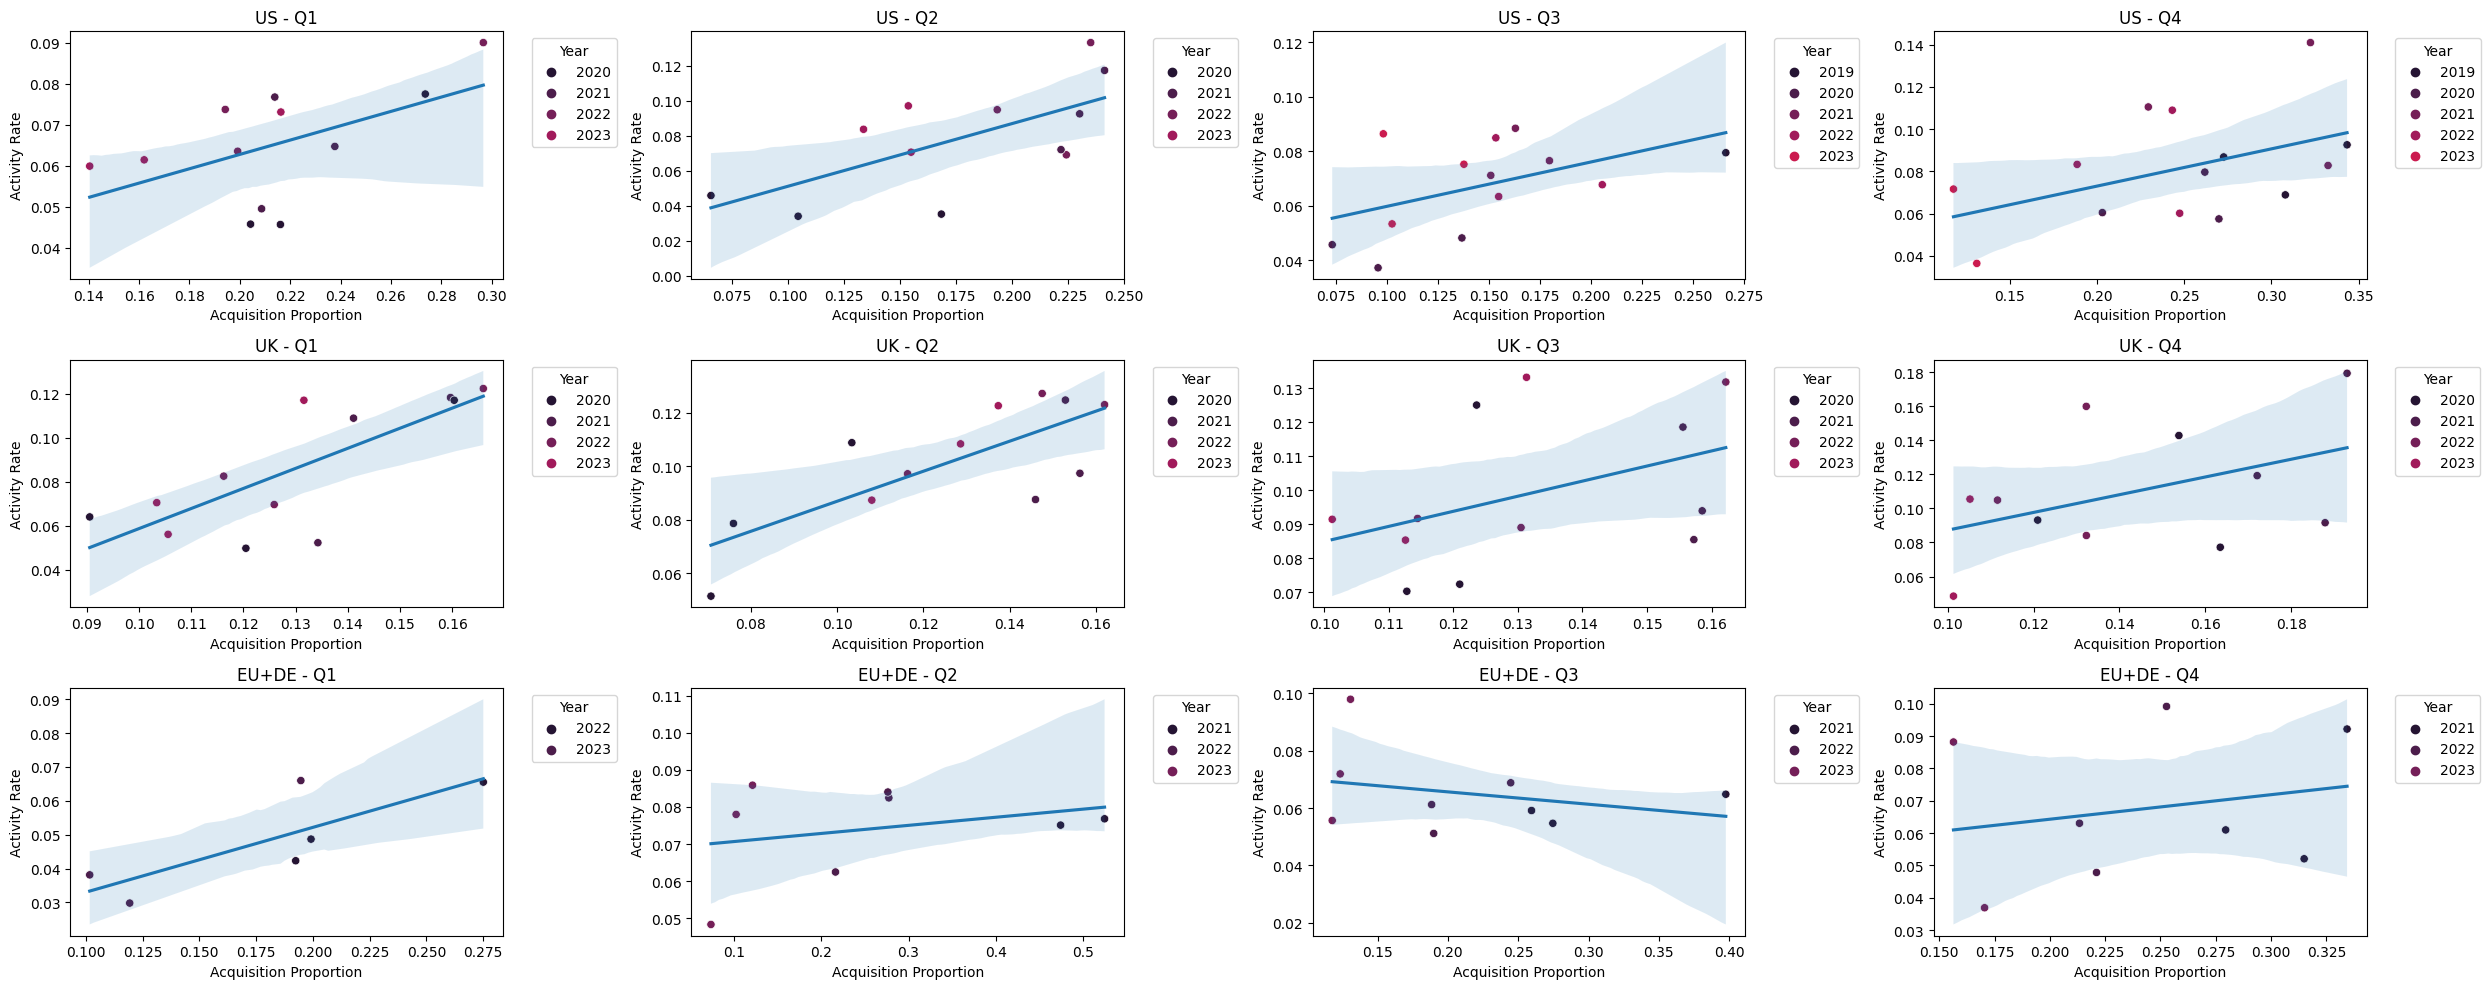

In [143]:
a

<ipython-input-137-85a0ba823ca3>:34: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  sns.scatterplot(x='Acquisition Proportion', y='Activity Rate', data=quarter_data, hue='Year', palette=sns.color_palette("rocket", 9), ax=ax)
<ipython-input-137-85a0ba823ca3>:34: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  sns.scatterplot(x='Acquisition Proportion', y='Activity Rate', data=quarter_data, hue='Year', palette=sns.color_palette("rocket", 9), ax=ax)
<ipython-input-137-85a0ba823ca3>:34: UserWarning: The palette list has more values (9) than needed (5), which may not be intended.
  sns.scatterplot(x='Acquisition Proportion', y='Activity Rate', data=quarter_data, hue='Year', palette=sns.color_palette("rocket", 9), ax=ax)
<ipython-input-137-85a0ba823ca3>:34: UserWarning: The palette list has more values (9) than needed (5), which may not be intended.
  sns.scatterplot(x='Acquisition Proportion', y

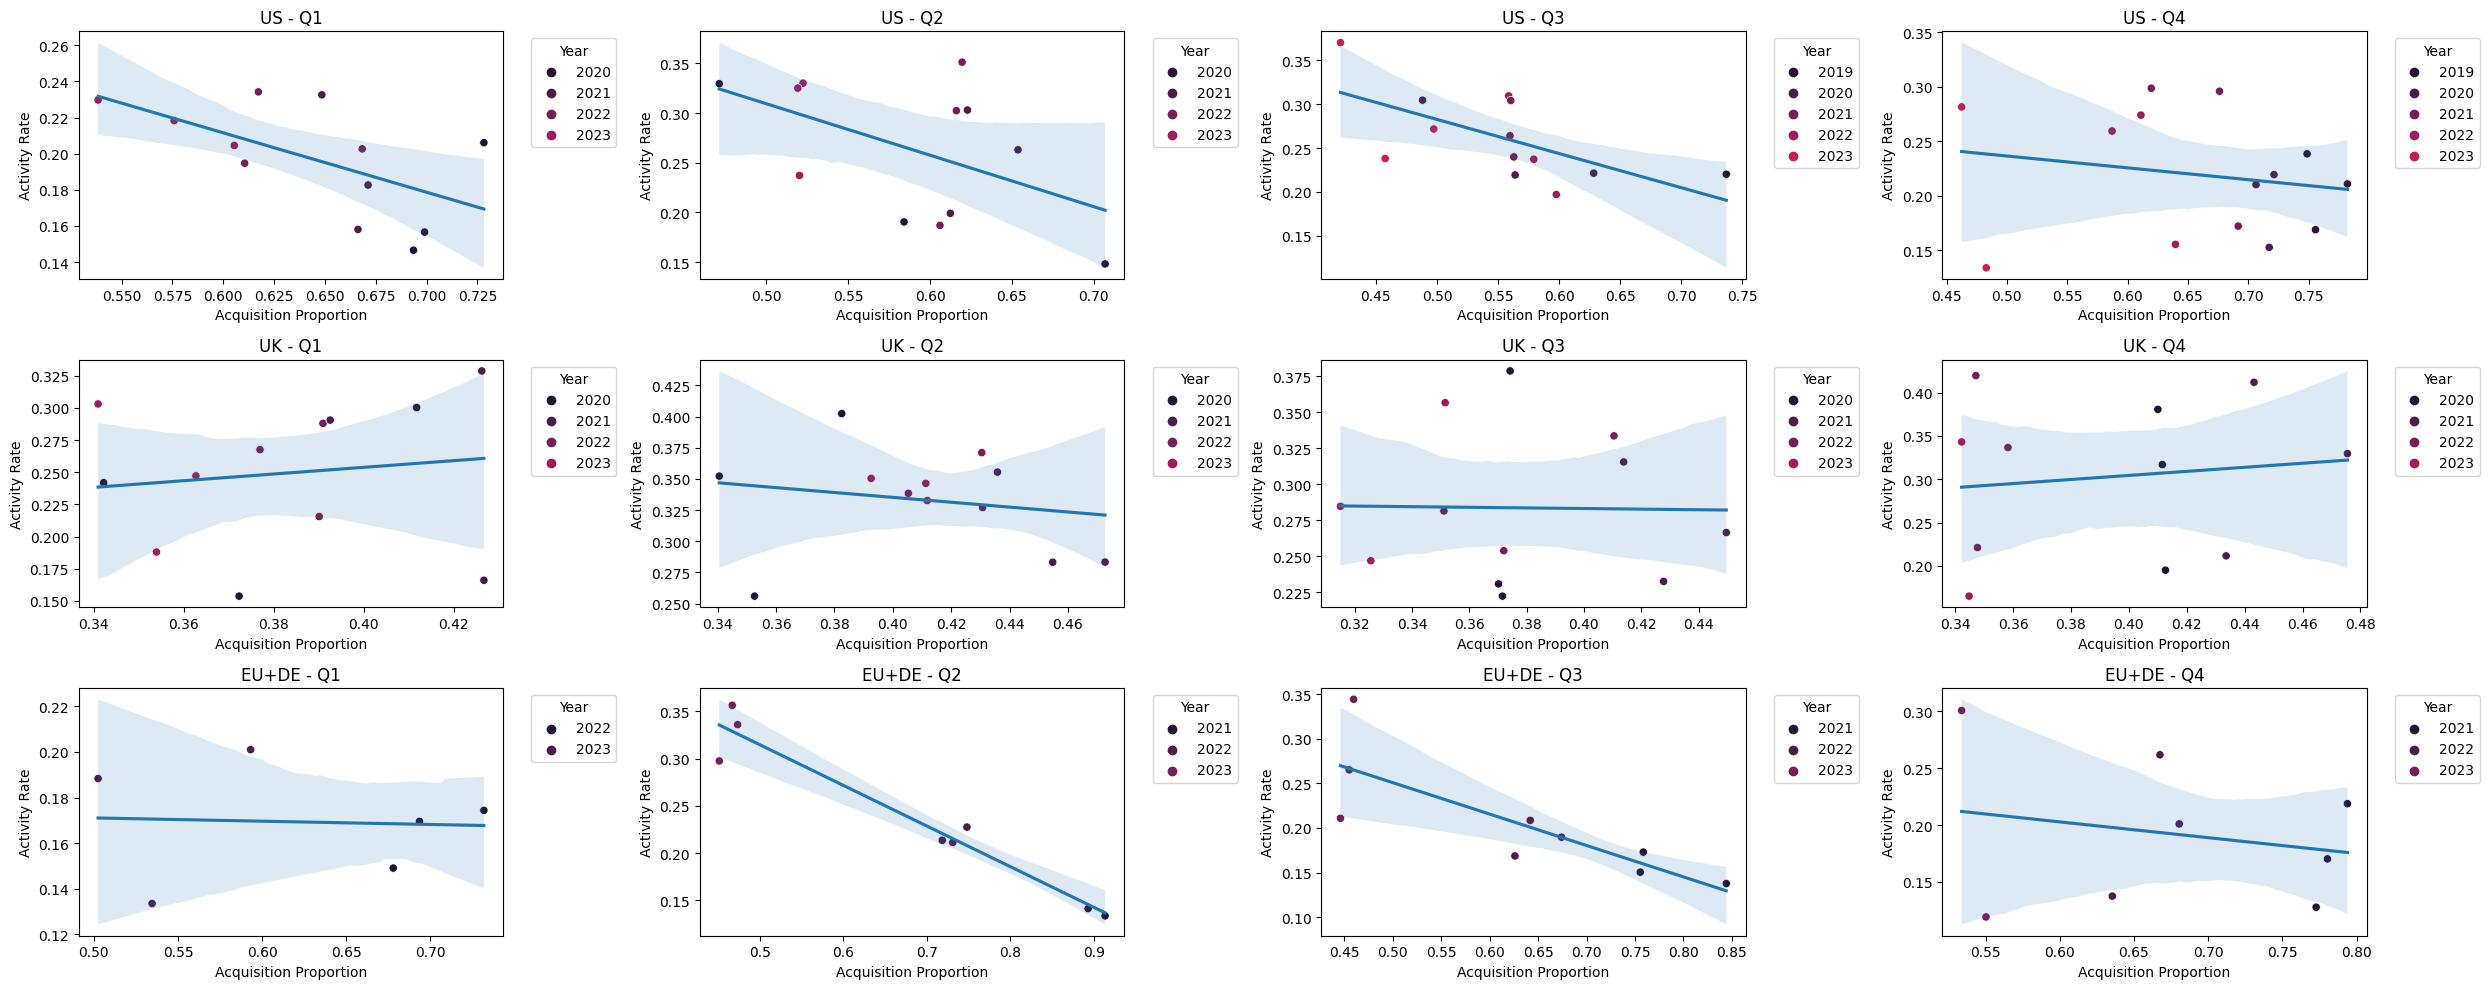

In [144]:
plot_store_quarter(data3)


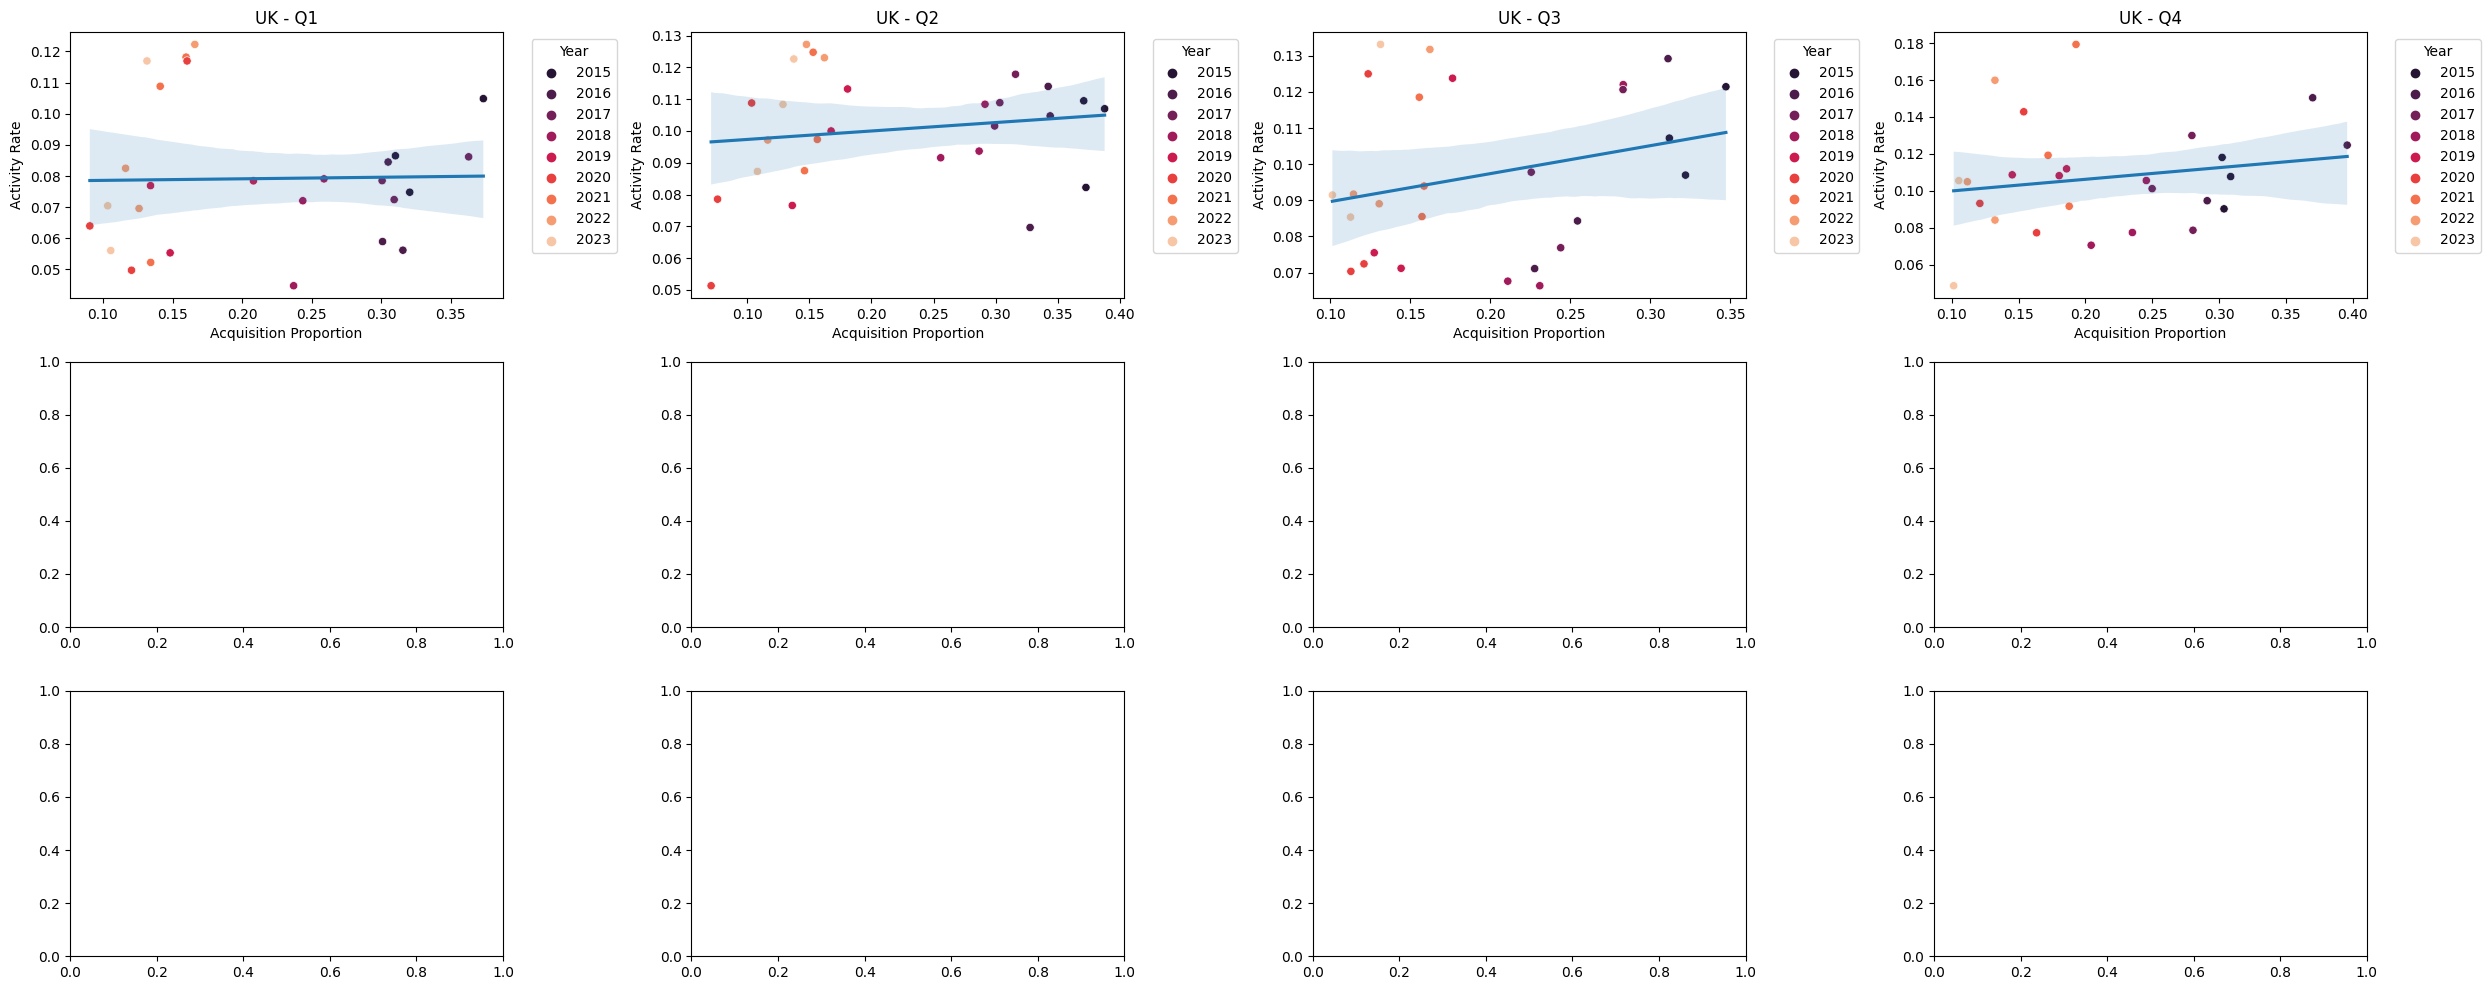

In [123]:
plot_store_quarter(data12[data12['Store'] == 'UK'])


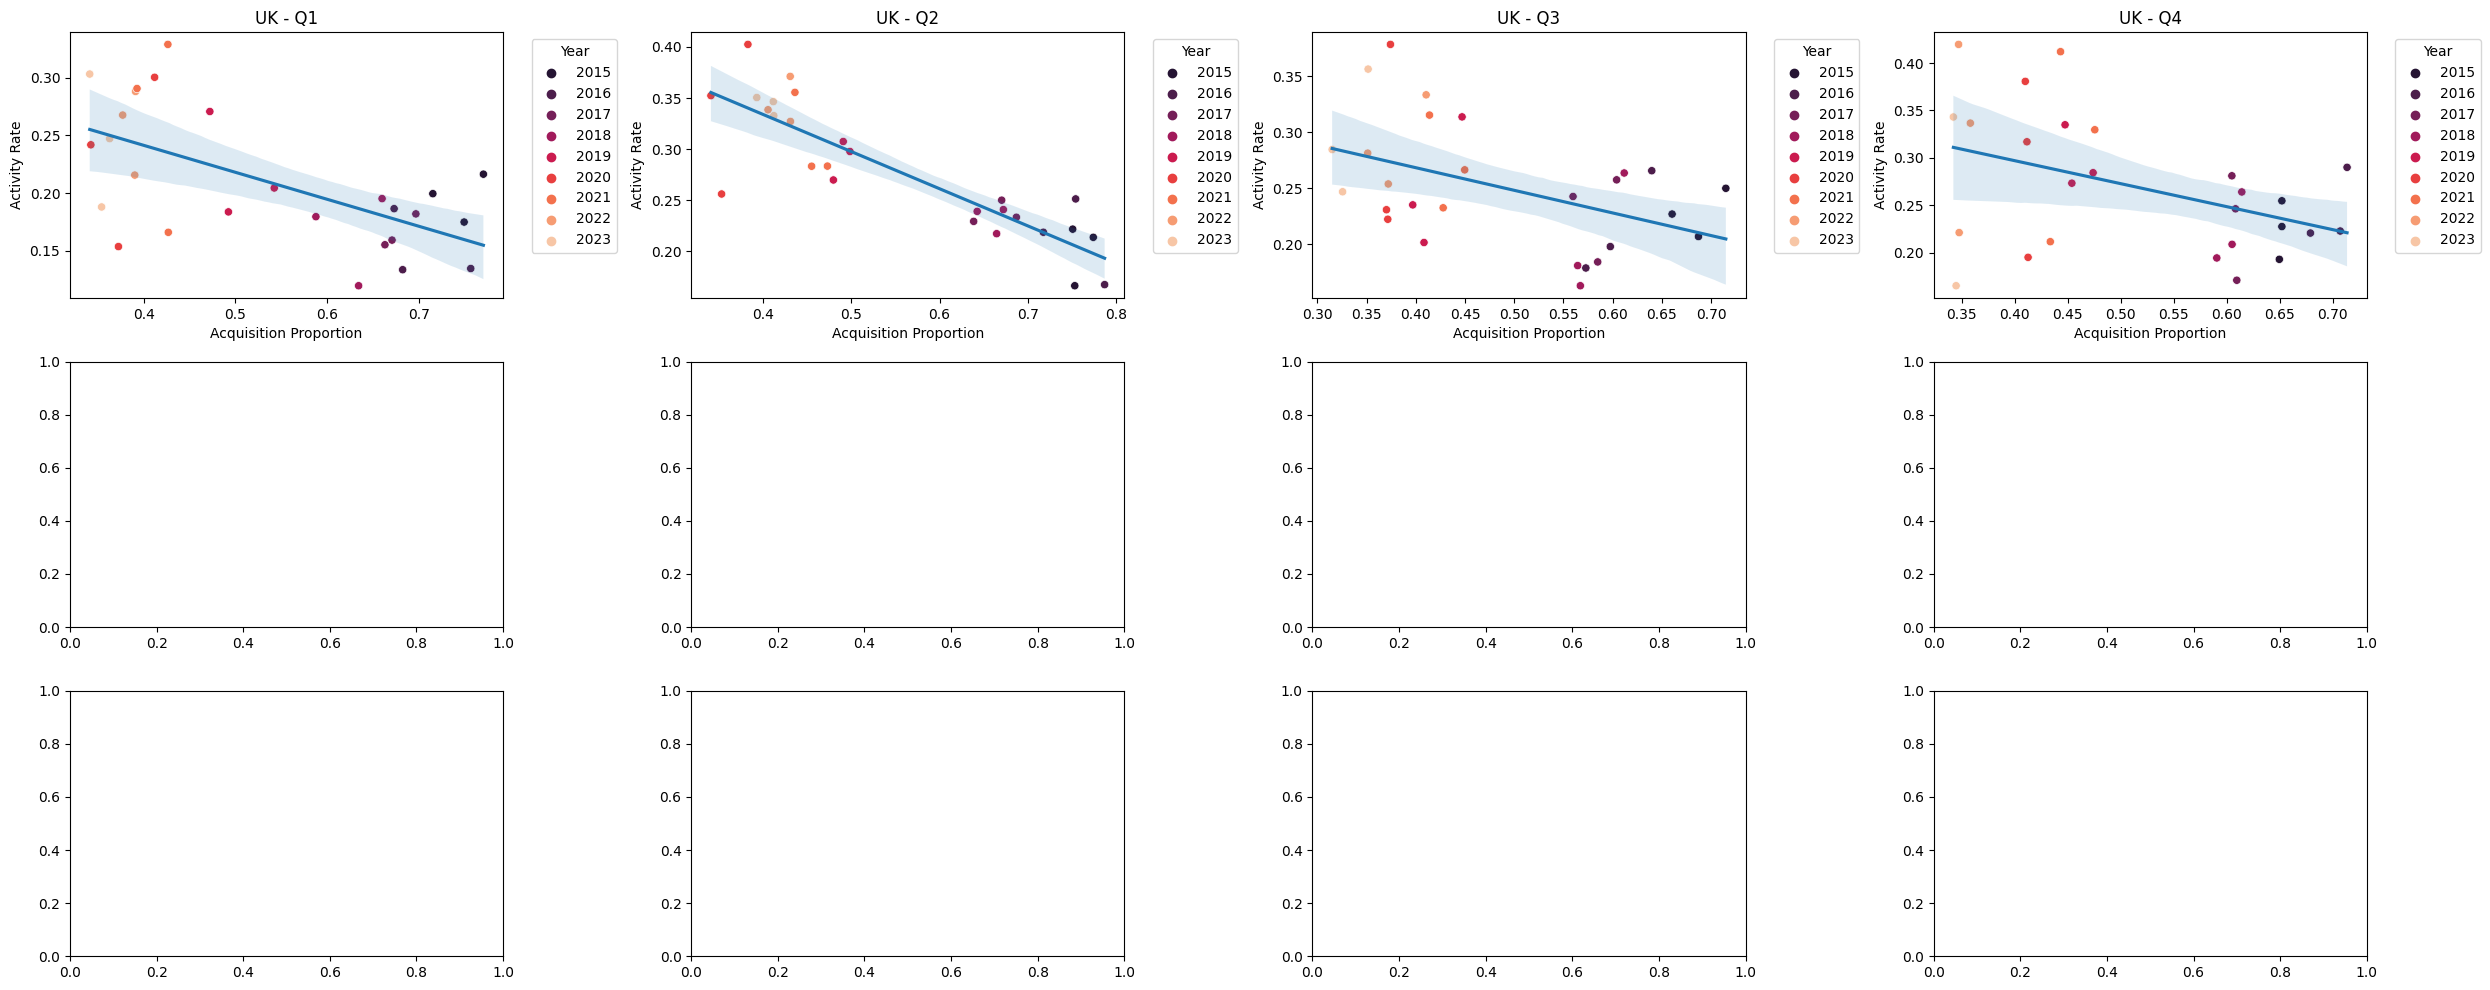

In [134]:
plot_store_quarter(data3[data3['Store'] == 'UK'])
